
Optionals: 
1. We might need to implement random data at the end of the project.

# Import of Important Library, Network and Meta Data

In [89]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# Import Network data
networkData = pd.read_csv('TD3_primary_undirected_temporal.csv')
networkData

,time,node-i,node-j
0,0,58,63
1,0,59,64
2,0,63,66
3,0,85,190
4,0,85,214
...,...,...,...
125768,3099,152,172
125769,3099,152,174
125770,3099,167,180
125771,3099,172,178


In [91]:
# Import MetaData [information on the nodes (class, gender)]
metadata = pd.read_csv("TD3_primary_metadata.csv")
metadata

,node-index,class,gender
0,0,5B,M
1,1,5B,F
2,2,5B,M
3,3,5B,F
4,4,5B,M
...,...,...,...
237,237,2A,M
238,238,2A,F
239,239,2A,M
240,240,1B,F


# Initialisation of Simulation


1. 1 / alpha : latent period of virus
2. 1 / gamma : mean infectious period
3. beta : contact rate

In [92]:
ALPHA = 2 #S -> E
BETA = 0.1  #E -> I
GAMMA = 0.01 #I -> R

## Flags of State of Nodes
SUSCEPTIBLE = 1
EXPOSED = 2
INFECTIOUS = 3
RECOVERED = 4

# Simulation

In [93]:
tMax = networkData['time'].max()

numOfNodes = metadata.shape[0]
print("Number of Nodes: ", numOfNodes)

#Initisaltion od Status Matrix, where everyone is susceptible
statusMatrix = np.full((tMax+1, numOfNodes), SUSCEPTIBLE)
print(statusMatrix.shape)

Number of Nodes:  242
(3100, 242)


In [94]:
NUMOFPATIENTZERO = int(0.25*numOfNodes)
np.random.seed(0)
patientZerosArray = np.random.randint(0, numOfNodes, size=NUMOFPATIENTZERO)
for patientZero in patientZerosArray:
    statusMatrix[0][patientZero] = EXPOSED

print(statusMatrix[0])

[1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 2 2 1 2 1 2
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1
 1 1 1 2 1 2 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2
 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]


In [95]:
from collections import defaultdict
edgesDictionaryWRTTime = [defaultdict(list) for time in range(0, tMax + 1)]

for time, node_i, node_j in networkData.values:
    edgesDictionaryWRTTime[time][node_i].append(node_j)
    edgesDictionaryWRTTime[time][node_j].append(node_i)
print(edgesDictionaryWRTTime[0])

defaultdict(<class 'list'>, {58: [63], 63: [58, 66], 59: [64], 64: [59], 66: [63], 85: [190, 214], 190: [85], 214: [85, 191], 102: [115], 115: [102], 191: [199, 214], 199: [191]})


In [96]:
rand = lambda proba, numOfNodes: np.random.uniform(0, 1, size=numOfNodes) < proba

In [97]:
for t in range(tMax):
    statusMatrix[t+1] = statusMatrix[t]
    exposedPopulation = np.where(statusMatrix[t]==EXPOSED)[0]
    newlyInfected = exposedPopulation[rand(ALPHA,len(exposedPopulation))]
    statusMatrix[t+1, newlyInfected] = INFECTIOUS

    infectedPopulation = np.where(statusMatrix[t]==INFECTIOUS)[0]
    riskContact = np.array([node_j for node_i in infectedPopulation for node_j in edgesDictionaryWRTTime[t][node_i] if statusMatrix[t,node_j]==SUSCEPTIBLE], dtype=int)
    newlyExposed = riskContact[rand(BETA, len(riskContact))]
    statusMatrix[t+1, newlyExposed] = EXPOSED
    
    newlyRecovered = infectedPopulation[rand(GAMMA, len(infectedPopulation))]
    statusMatrix[t+1, newlyRecovered] = RECOVERED
    
print(np.where(statusMatrix[tMax]==RECOVERED)[0])

[  0   1   2   3   4   7   8   9  11  12  13  14  15  17  18  19  20  21
  22  23  24  25  28  29  30  31  32  33  34  36  37  38  39  41  44  45
  46  47  48  49  51  52  53  54  56  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  74  75  76  77  78  79  80  81  82  83  84  85
  87  88  90  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 124 127
 128 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 146 147
 148 149 151 152 153 154 156 157 159 160 161 163 165 166 167 169 170 171
 172 173 174 175 176 177 178 179 182 183 185 188 189 192 193 194 195 197
 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215 216 219 220
 222 223 226 227 228 229 230 231 232 235 237 238 239 240 241]


In [98]:
# Plotting the growth of S, E, I and R populations
listPopulations = [] # List of dicts, indexed by timestep #np.zeros(shape=(tMax))
print(statusMatrix[1])
for timestep in range(tMax):
    temp = np.unique(statusMatrix[timestep], return_counts=True)
    #print(temp)
    listPopulations.append( dict(zip(temp[0], temp[1])) )

listPopulations = pd.DataFrame.from_dict(listPopulations).fillna(0).astype(int)
print(listPopulations.head())
# Do this at your own risk.
# print(listPopulations)

[1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 3 3 1 3 3 1 3 1 3
 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 3 1 3 1
 1 1 1 3 1 3 1 3 3 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 3 3 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 3
 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 3 1 3 3 1 3 1 1 1 1 1 3 1
 3 1 1 1 1 1 1 3 3 1 3 1 3 1 1 1 1 3 3 1 1 1 1 3 1 1 3 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1]
     1   2   3  4
0  191  51   0  0
1  191   0  51  0
2  191   0  50  1
3  190   1  50  1
4  190   0  50  2


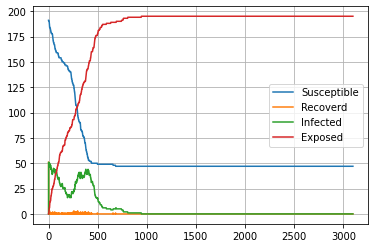

In [99]:
# Now we're plotting things
listPopulations.plot()
plt.legend({'Susceptible','Exposed','Infected','Recoverd'})
plt.grid()